# Project 3: Poisonous Mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 examples, where each describes a mushroom by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. The feature space has been binarized. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using k-means and density estimation with Gaussian mixture models (GMM). Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please **prepare your own write-up and write your own code**.

In [66]:
%matplotlib inline

import urllib.request as urllib2 # For python3
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from matplotlib.colors import LogNorm

from scipy.spatial.distance import cdist

In [67]:
MUSHROOM_DATA = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.data'
MUSHROOM_MAP = 'https://raw.githubusercontent.com/UCB-MIDS/207-Applied-Machine-Learning/master/Data/mushroom.map'

Load feature names.

In [68]:
feature_names = []

for line in urllib2.urlopen(MUSHROOM_MAP):
    [index, name, junk] = line.decode('utf-8').split()
    feature_names.append(name)

print('Loaded feature names: ', len(feature_names))
print(feature_names)

Loaded feature names:  126
['cap-shape=bell', 'cap-shape=conical', 'cap-shape=convex', 'cap-shape=flat', 'cap-shape=knobbed', 'cap-shape=sunken', 'cap-surface=fibrous', 'cap-surface=grooves', 'cap-surface=scaly', 'cap-surface=smooth', 'cap-color=brown', 'cap-color=buff', 'cap-color=cinnamon', 'cap-color=gray', 'cap-color=green', 'cap-color=pink', 'cap-color=purple', 'cap-color=red', 'cap-color=white', 'cap-color=yellow', 'bruises?=bruises', 'bruises?=no', 'odor=almond', 'odor=anise', 'odor=creosote', 'odor=fishy', 'odor=foul', 'odor=musty', 'odor=none', 'odor=pungent', 'odor=spicy', 'gill-attachment=attached', 'gill-attachment=descending', 'gill-attachment=free', 'gill-attachment=notched', 'gill-spacing=close', 'gill-spacing=crowded', 'gill-spacing=distant', 'gill-size=broad', 'gill-size=narrow', 'gill-color=black', 'gill-color=brown', 'gill-color=buff', 'gill-color=chocolate', 'gill-color=gray', 'gill-color=green', 'gill-color=orange', 'gill-color=pink', 'gill-color=purple', 'gill-col

Load data. The dataset is sparse, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [69]:
X, Y = [], []

for line in urllib2.urlopen(MUSHROOM_DATA):
    items = line.decode('utf-8').split()
    Y.append(int(items.pop(0)))
    x = np.zeros(len(feature_names))
    for item in items:
        feature = int(str(item).split(':')[0])
        x[feature] = 1
    X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


### Part 1:

Do a principal components analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 2, 3, 4, 5, 10, 20, 30, 40, 50].  Also show a lineplot of fraction of total variance vs. number of principal components, for all possible numbers of principal components.

Notes:
* You can use `PCA` to produce a PCA analysis.

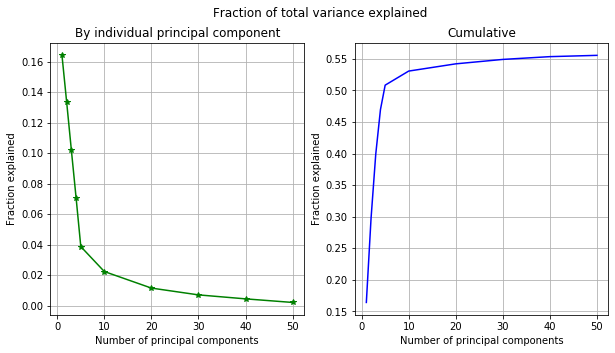

In [70]:
def P1():

### STUDENT START ###
    components = [1,2,3,4,5,10,20,30,40,50] 
    variance_explained=np.zeros(len(components))
    cum_variance_explained=np.zeros(len(components))
    i=0
    for k in components:
        pca = PCA(n_components=k)
    pca.fit(train_data)
#        print(k, pca.explained_variance_ratio_)
#        print(pca.singular_values_)
    for i in range(10):
        variance_explained[i] = pca.explained_variance_ratio_[components[i]-1]
    cum_variance_explained[0]= variance_explained[0]
    for i in range(1,10):
        cum_variance_explained[i] += cum_variance_explained[i-1] + variance_explained[i]

    fig, ax = plt.subplots(1,2,figsize=(10,5))
    ax[0].plot(components, variance_explained, c='green',label="var. explained",marker="*")
    ax[1].plot(components,cum_variance_explained, c="blue", label="Total variance explained")
    #ax.legend()
    ax[0].grid(True)         
    ax[0].set_xlabel("Number of principal components")
    ax[0].set_ylabel("Fraction explained")
    ax[0].set_title("By individual principal component")
    ax[1].grid(True)         
    ax[1].set_xlabel("Number of principal components")
    ax[1].set_ylabel("Fraction explained")
    ax[1].set_title("Cumulative")
    fig.suptitle("Fraction of total variance explained")
    fig.show
### STUDENT END ###

P1()

### Part 2:

PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and show as a square scatterplot. Show the positive (poisonous) examples in red and the negative (non-poisonous) examples in green. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

Notes:
* You can use `PCA` to produce a PCA analysis.

(7000, 2)


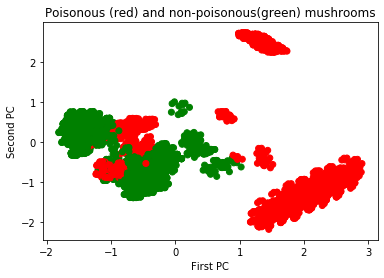

In [71]:
def P2():

### STUDENT START ###
    pca=PCA(n_components=2)
    X_pca=pca.fit_transform(train_data)
    print(X_pca.shape)
    x = X_pca[:,0]
    y = X_pca[:,1]
    col = []
    for i in range(7000):
        if (train_labels[i] > 0): 
            col.append("red") 
        else:
            col.append("green")
    plt.scatter(x,y,c=col)
    plt.xlabel("First PC")
    plt.ylabel("Second PC")
    plt.title("Poisonous (red) and non-poisonous(green) mushrooms")
### STUDENT END ###

P2()

### Part 3:

Fit a k-means cluster model with 6 clusters over the 2d projected data. As in part 2, show as a square scatterplot with the positive (poisonous) examples in red and the negative (non-poisonous) examples in green.  For each cluster, mark the centroid and plot a circle that goes through the cluster's example that is most distant from the centroid.

Notes:
* You can use `KMeans` to produce a k-means cluster analysis.
* You can use `linalg.norm` to determine distance (dissimilarity) between observations.

In [72]:
def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

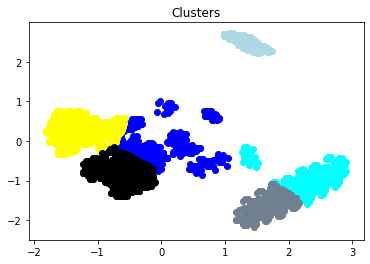

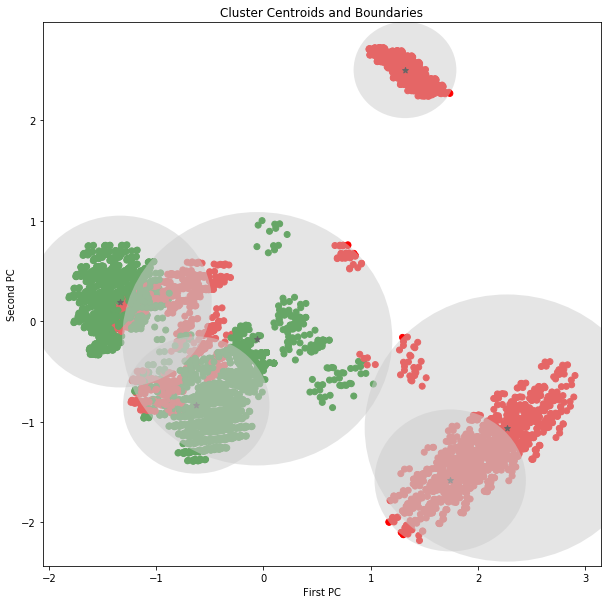

In [73]:
from sklearn.cluster import KMeans
import numpy as np
def P3():

### STUDENT START ###
    pca=PCA(n_components=2)
    X_pca = pca.fit_transform(train_data)
#    print("x_transform",X_pca.shape)

    kmeans = KMeans(n_clusters=6, random_state=0).fit(X_pca)
#    print(kmeans.labels_)
    kmeans.predict(X_pca)
    centroids = kmeans.cluster_centers_
#    print(kmeans.cluster_centers_)
    
    for lab, col in zip((0,1,2,3,4,5),
                        ('blue','lightblue','yellow','cyan','black','slategrey')):
        plt.scatter(X_pca[kmeans.labels_==lab, 0],
                    X_pca[kmeans.labels_==lab, 1],
                    label=lab,
                    c=col)
    plt.title("Clusters")
    
    col1=[]
    for i in range(7000):
        if (train_labels[i] > 0): 
            col1.append("red")
        else:
            col1.append("green")
            
    fig, ax = plt.subplots(figsize=[10,10])
    ax.scatter(X_pca[:,0],X_pca[:,1],c=col1)
    ax.scatter(centroids[:,0],centroids[:,1],marker="*",color="black")
    # plot the representation of the KMeans model
#    print(kmeans.labels_.shape)
    radii = [cdist(X_pca[kmeans.labels_ == i], [center]).max()
             for i, center in enumerate(centroids)]
    for c, r in zip(centroids, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
    ax.set_title("Cluster Centroids and Boundaries")
    ax.set_xlabel("First PC")
    ax.set_ylabel("Second PC")
    plt.show()
    
    
### STUDENT END ###



P3()

### Part 4:

Fit Gaussian mixture models for the positive (poisonous) examples in your 2d projected data. Vary the number of mixture components from 1 to 4 and the covariance matrix type 'spherical', 'diag', 'tied', 'full' (that's 16 models).  Show square plots of the estimated density contours presented in a 4x4 grid - one row each for a number of mixture components and one column each for a convariance matrix type.  

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `contour` in combination with other methods to plot contours, like in this example: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py
* You can use `contour` without the `norm` and `levels` parameters. 

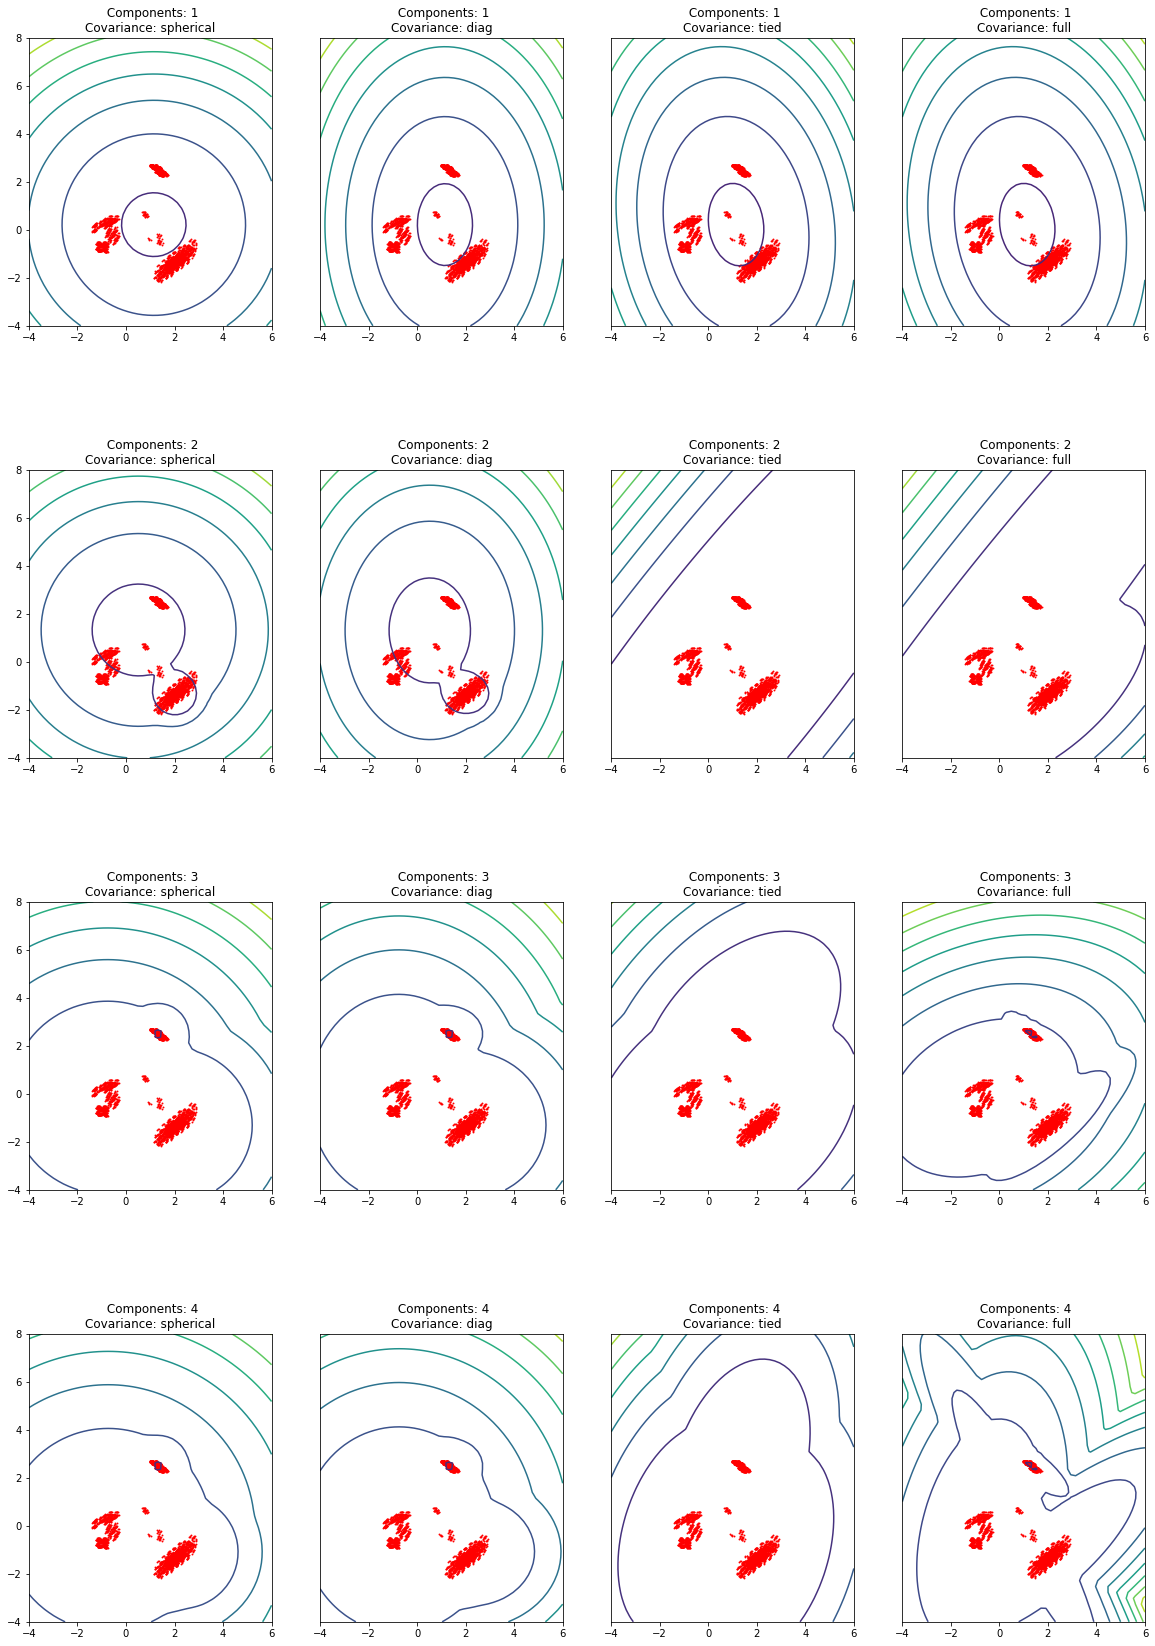

In [74]:
def P4():

    ### STUDENT START ###
    pca=PCA(n_components=2)
    X_pca = pca.fit_transform(train_data)
    cov_types = ['spherical', 'diag', 'tied', 'full']
    red = [i for i in range(7000) if train_labels[i] ==1]
    x_red = X_pca[red]
    means=np.zeros(16).reshape(4,4)
    cov=np.ones(16).reshape(4,4)

    # display predicted scores by the model as a contour plot
    x = np.linspace(-4., 6.)
    y = np.linspace(-4., 8.)
    X, Y = np.meshgrid(x, y)
    XX = np.array([X.ravel(), Y.ravel()]).T

    fig,ax = plt.subplots(4,4,figsize = (20,20))

    for comp in range(4):
        for c in range(len(cov_types)):
            gmm = GaussianMixture(n_components=comp+1,covariance_type=cov_types[c],random_state=12345).fit(x_red)
            Z = -gmm.score_samples(XX)
            Z = Z.reshape(X.shape)
            CS=ax[comp,c].contour(X,Y,Z)
    #        CB=ax[comp,c].colorbar(CS,shrink=0.8, extend='both')
            ax[comp,c].scatter(x_red[:, 0], x_red[:, 1], 0.8,color="red")
    #        if (comp < 3):
    #            ax[comp,c].xaxis.set_visible(False)
            if (c > 0):
                ax[comp,c].yaxis.set_visible(False)
            title= " Components: " + str(comp+1)  + "\nCovariance: " + cov_types[c]
            ax[comp,c].title.set_text(title)
            fig.subplots_adjust(bottom=0.4)
    #        
    #CS = plt.contour(X, Y, Z)
    #CB = plt.colorbar(CS, shrink=0.8, extend='both')
    #plt.scatter(x_red[:, 0], x_red[:, 1], .8)
    fig.subplots_adjust(hspace=0.5, top=1.5)
    #fig.supertitle('Negative log-likelihood predicted by a GMM')
    #fig.axis('tight')
    plt.show()
    ### STUDENT END ###

    
P4()

### Part 5:

Fit two Gaussian mixture models, one for the positive examples and one for the negative examples in your 2d projected data. Use 4 mixture components and full convariance for each model.  Predict the test example labels by picking the labels corresponding to the larger of the two models' probabilities.  What is the accuracy of you predictions on the test data?

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.
* You can use `GaussianMixture`'s `score_samples` method to find the probabilities.

In [75]:
def proba(train_set, test_set, subindex):
    ### train a subset of train_set and test on test_set
    ### return probabilities
    n=len(subindex)
    x_sub=np.zeros(shape=(n,2))
    for i in range(n):
        x_sub[i,0] = train_set[subindex[i],0]
        x_sub[i,1] = train_set[subindex[i],0]
#    print (x_sub.shape)

    gmm_sub = GaussianMixture(n_components=4,covariance_type="full",random_state=12345).fit(x_sub)
    pred_sub= gmm_sub.predict(test_set)
#    print(pred_sub.shape)
#    print(gmm_sub.score_samples(test_set))
    sub_proba = gmm_sub.score_samples(test_set)
    return sub_proba

In [76]:
def P5():
    
    ### STUDENT START ###
    pca=PCA(n_components=2)
    X_pca = pca.fit_transform(train_data)
    test_pca = pca.fit_transform(test_data)

    #ired = tuple([(i,j) for (i,j) in range(X_pca.shape) if train_labels[i] == 1])
    ired=[i for i in range(X_pca.shape[0]) if train_labels[i] == 1]
    red_proba = proba(X_pca,test_pca, ired)

    igreen=[i for i in range(X_pca.shape[0]) if train_labels[i] == 0]
    green_proba = proba(X_pca, test_pca, igreen)
    
    # predict by comparing probabilities. 0 is green, 1 is red
    n= test_pca.shape[0]
    pred_label = np.empty(n)
    for i in range(n):
        pred_label[i] = (red_proba[i] > green_proba[i])
#    print(pred_label)
    
    # model accuracy
    # calculate true >0; true <0, false >0 and false <0 
    TP_ind = [i for i in range(n) if (test_labels[i] == 1 and pred_label[i] == 1)]
    TP=len(TP_ind)
    TN_ind = [i for i in range(n) if (test_labels[i] == 0 and pred_label[i] == 0)]
    TN=len(TN_ind)
    FN_ind = [i for i in range(n) if (test_labels[i] == 1 and pred_label[i] == 0)]
    FN=len(FN_ind)
    FP_ind = [i for i in range(n) if (test_labels[i] == 0 and pred_label[i] == 1)]
    FP=len(FP_ind)
    
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    print("TP=",TP,", TN=",TN,", FP=",FP,", FN=",FN)
    print("Accuracy:",accuracy)
    ### STUDENT START ###

P5()

TP= 374 , TN= 406 , FP= 0 , FN= 344
Accuracy: 0.693950177935943


### Part 6:

Run a series of experiments to find the Gaussian mixture model that results in the best accuracy with no more than 50 parameters.  Do this by varying the number of PCA components, the number of GMM components, and the covariance type.

Notes:
* You can use `GaussianMixture(n_components=..., covariance_type=..., random_state=12345)` to produce a Gaussian mixture model.


* For spherical, diag, and full covariance types:
  * number of parameters = (number of parameters per gmm component * number of gmm components - 1) * number of classes
  * number of parameters per gmm component includes all the means plus all the non-zero, non-duplicated values in the covariance matrix plus the mixing weight
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter


* To calculate the number of parameters for tied covariance type:
  * number of parameters = (number of parameters per class - 1) * number of classes
  * number of parameters per class includes all the means and mixing weights for all the gmm components plus all the non-zero, non-duplicated values in the one shared covariance matrix
  * Each mixing weight parameter indicates how much to weight a particular gmm component; the -1 above accounts for the fact that the mixing weights must sum to 1, so you do not need to include the last mixing weight as its own parameter

In [77]:
cov_types = ['spherical', 'diag', 'tied', 'full']
def calc_param(n_class,n_pca,n_gmm,cov_type):
    
    ### calculate the number of parameters in Gaussian Mixture model given input parameters ###
    n_mean = n_pca*n_gmm
    if cov_type == 'tied':
        n_cov = n_pca*(n_pca+1)/2
    elif cov_type == 'spherical':
        n_cov = n_gmm*1
    elif cov_type == 'diag':
        n_cov = n_pca*n_gmm
    else:  # 'full'
        n_cov = n_pca*(n_pca + 1)/2*n_gmm
    n_param = (n_mean + n_cov) * n_class 

    return int(n_param)

In [78]:
import pandas as pd

def P6():

    ### STUDENT START ###

    out_list = []
    #df_gmm.columns = ['num_pca','num_gmm_comp','cov_type','accuracy','num_param']
    covtypes = ['spherical', 'diag', 'tied', 'full']
    n = 0 
    p=0
    g=0
    c=0
    num_class = 2


    g= 2
    next_g = True
    while(next_g):
        p = 1
        next_p = True
        while (next_p):
            num_less_50 = 4
            pca=PCA(n_components=p)
            X_pca = pca.fit_transform(train_data)
            test_pca = pca.fit_transform(test_data)
            for c in range(4):
                num_param = calc_param(num_class,p,g,covtypes[c])
    #            print("p=",p," g=",g," c=",c, " # param",num_param, "#<50", num_less_50)
                if num_param > 50:
                  num_less_50 -= 1
                else:
                    gmm = GaussianMixture(n_components=g,covariance_type=covtypes[c],random_state=12345).fit(X_pca)
                    pred= gmm.predict(test_pca)
                    accuracy = metrics.accuracy_score(test_labels,pred)
    #                print(g,p,covtypes[c],num_param)
                    out_list.append([p,g,covtypes[c],accuracy,num_param])
            if num_less_50 > 0:
                p += 1    
            else:
                next_p = False
    #            g += 1
        if p > 1:
            g += 1    
        else:
            next_g = False

    #print(len(out_list))
    # find max accuracy
    df_gmm = pd.DataFrame(out_list,columns=['num_pca','num_gmm_comp','cov_type','accuracy','num_param'])
    by_accuracy= df_gmm.sort_values(by = ['accuracy'],ascending = False)
    print(by_accuracy.head())

    ### STUDENT END ###

P6()

    num_pca  num_gmm_comp   cov_type  accuracy  num_param
13        4             2       diag  0.681495         32
19        6             2       diag  0.660142         48
16        5             2       diag  0.642349         40
20        7             2  spherical  0.638790         32
41        7             3  spherical  0.638790         48


This methodology is more expensive than the previous one since it involves searching for the best result while the previous one was the simplest possible (num_pca=2; n_gmm=2). It results in about the same accuracy (0.68 versus 0.69) 